# Задание 4

## Разведочный анализ данных (EDA) с использованием matplotlib

Тематика: Подержанные автомобили

Цель - проанализировать структуру данных о подержанных автомобилях в Великобритании, найти пропуски, аномалии и сделать обоснованные выводы на основе графиков и статистик

Источник: [Used Cars Prices in UK](https://www.kaggle.com/datasets/muhammadawaistayyab/used-cars-prices-in-uk/data) (Kaggle)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os

## 1. Загрузка и общая характеристика данных

In [4]:
path = kagglehub.dataset_download("muhammadawaistayyab/used-cars-prices-in-uk")
csv_path = os.path.join(path, "used_cars_UK.csv")
df = pd.read_csv(csv_path)
df.head(10)

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
5,5,Hyundai Coupe,800,124196,2007,3.0,Petrol,Coupe,2.0L,Manual,3.0,4.0,Euro 4,NaN
6,6,Ford Focus,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,7,Vauxhall Corsa,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,8,Volvo 740,750,225318,1989,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
9,9,Peugeot 207,1299,87000,2008,5.0,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN


In [6]:
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print()
print("Типы данных:")
print(df.dtypes)

Количество строк: 3685
Количество столбцов: 14

Типы данных:
Unnamed: 0             int64
title                 object
Price                  int64
Mileage(miles)         int64
Registration_Year      int64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object


**Описание датасета:**

| Признак               | Описание                     | Тип        |
|-----------------------|------------------------------|------------|
| title                 | Название модели              | object |
| Price                 | Цена                         | числовой   |
| Mileage(miles)        | Пробег (мили)                | числовой   |
| Registration_Year     | Год регистрации              | числовой   |
| Previous Owners       | Количество предыдущих владельцев | числовой |
| Fuel type             | Тип топлива                  | object |
| Body type             | Тип кузова                   | object |
| Engine                | Объём двигателя              | object |
| Gearbox               | Тип трансмиссии              | object |
| Doors                 | Число дверей                 | числовой   |
| Seats                 | Число мест                   | числовой   |
| Emission Class        | Класс выбросов               | object |
| Service history       | История обслуживания         | object |

## 2. Анализ пропусков

In [9]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Пропуски': missing, 'Процент (%)': missing_pct})
missing_df = missing_df[missing_df['Пропуски'] > 0].sort_values('Процент (%)', ascending=False)
print("Итоговая таблица пропусков:")
missing_df

Итоговая таблица пропусков:


,Пропуски,Процент (%)
Service history,3145,85.35
Previous Owners,1409,38.24
Emission Class,87,2.36
Engine,45,1.22
Seats,35,0.95
Doors,25,0.68


C:\Users\Platon\AppData\Local\Temp\ipykernel_58860\408487902.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


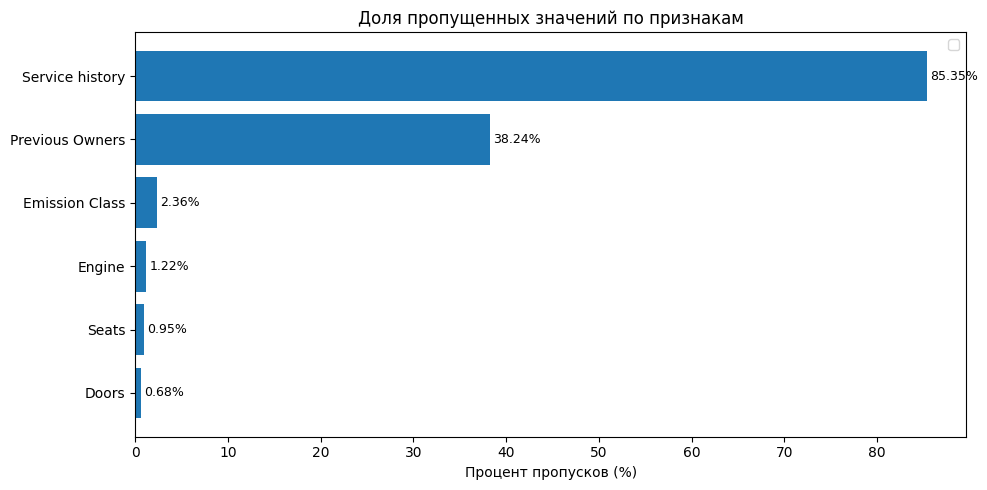

In [15]:
cols_with_na = missing_df.index.tolist()
vals = missing_df['Процент (%)'].values

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(cols_with_na, vals)
ax.set_xlabel('Процент пропусков (%)')
ax.set_title('Доля пропущенных значений по признакам')
ax.invert_yaxis()
for bar, v in zip(bars, vals):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height() / 2, f'{v}%', va='center', fontsize=9)
ax.legend()
plt.tight_layout()
plt.show()

### Стратегия обработки пропусков

Анализ показывает, что наибольший процент пропусков у признака **Service history** - более 60%. Рассмотрим стратегии:

1. **Service history** - пропуски > 60%. Заполняем специальной категорией 'Unknown', т.к. удаление привело бы к существенной потере данных.
2. **Previous Owners** - пропуски около 20%. Это числовой признак, распределение смещено (выбросы), поэтому заполняем **медианой**.
3. **Doors, Seats** - небольшой процент пропусков. Заполняем **медианой**, так как значения дискретные и могут содержать выбросы.
4. **Emission Class** - категориальный, заполняем **модой** (наиболее частое значение).

In [16]:
df['Service history'] = df['Service history'].fillna('Unknown')
df['Previous Owners'] = df['Previous Owners'].fillna(df['Previous Owners'].median())
df['Doors'] = df['Doors'].fillna(df['Doors'].median())
df['Seats'] = df['Seats'].fillna(df['Seats'].median())
df['Emission Class'] = df['Emission Class'].fillna(df['Emission Class'].mode()[0])

print("Пропуски после обработки:")
remaining = df.isnull().sum()
remaining[remaining > 0]

Пропуски после обработки:


Engine    45
dtype: int64

### Подготовка вспомогательных столбцов

In [17]:
df['Engine_L'] = df['Engine'].str.replace('L', '').astype(float)
df['Emission_Num'] = df['Emission Class'].str.extract(r'Euro\s*(\d+)').astype(float)
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Engine_L,Emission_Num
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,1.4,6.0
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,1.2,4.0
2,2,Hyundai i30,949,137000,2011,3.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,1.4,5.0
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,1.4,4.0
4,4,Vauxhall Corsa,1000,85000,2013,3.0,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,1.3,5.0


## 3. Статистические оценки

### 3.1 Числовые признаки

In [19]:
numeric_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Doors', 'Seats', 'Engine_L', 'Emission_Num']
stats = df[numeric_cols].agg(['mean', 'median', 'min', 'max']).round(2)
stats.index = ['Среднее', 'Медиана', 'Минимум', 'Максимум']
stats

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Engine_L,Emission_Num
Среднее,5787.15,81328.16,2011.84,2.88,4.33,4.9,1.61,4.91
Медиана,4000.00,80000.00,2012.00,3.00,5.00,5.0,1.60,5.00
Минимум,400.00,1.00,1953.00,1.00,2.00,2.0,0.80,1.00
Максимум,33900.00,1110100.00,2023.00,9.00,5.00,7.0,6.30,6.00


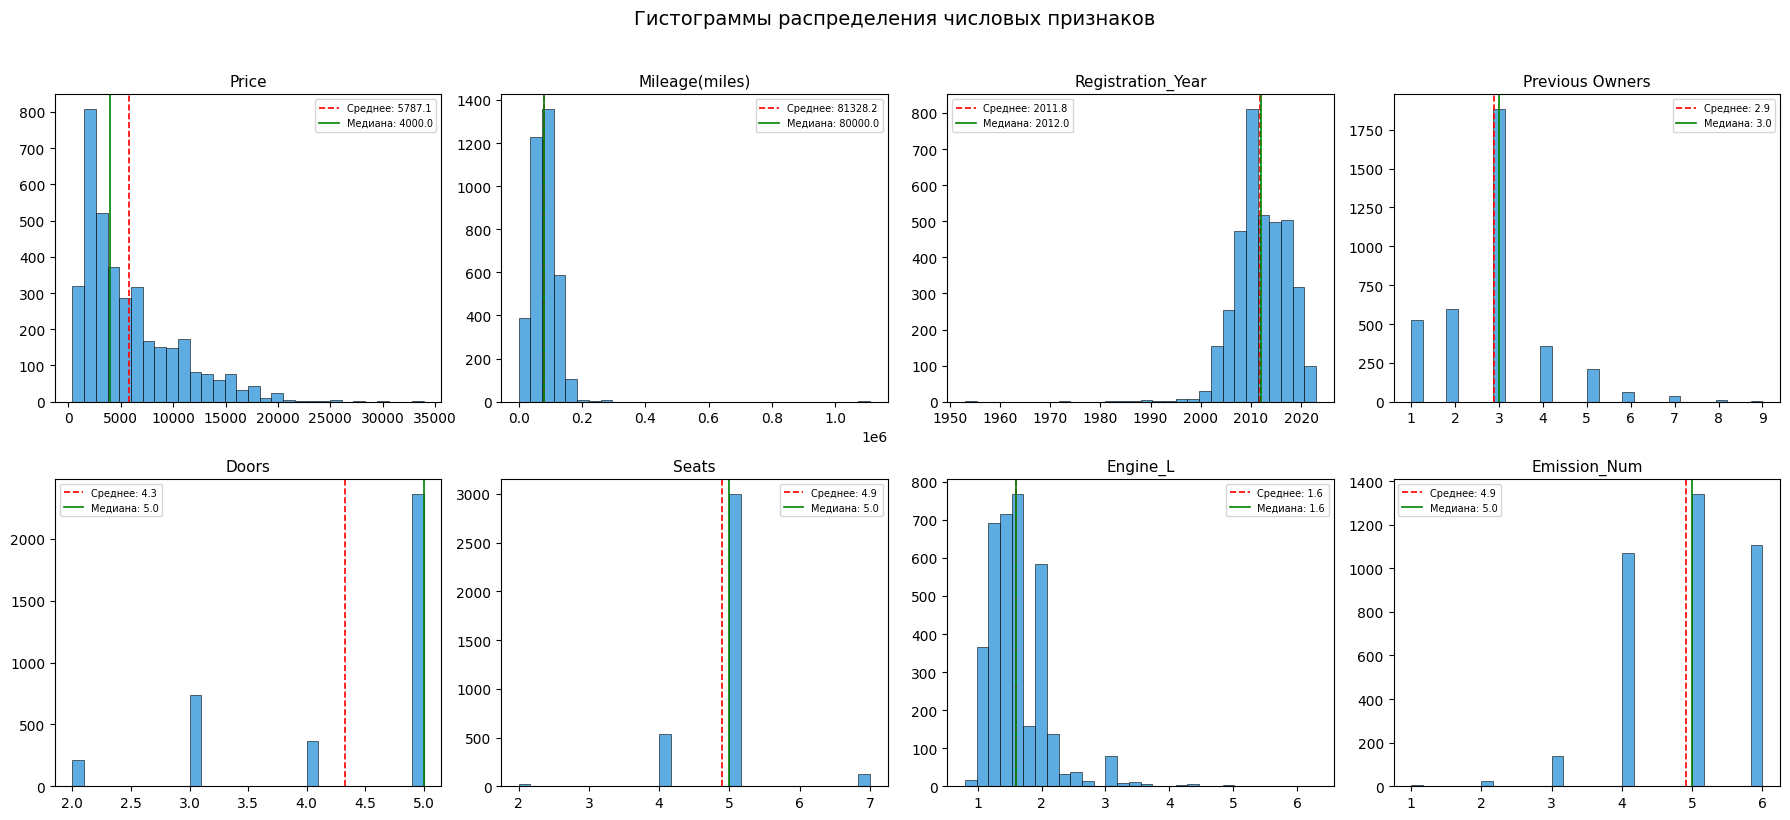

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    data = df[col].dropna()
    axes[i].hist(data, bins=30, color='#3498db', edgecolor='black', linewidth=0.5, alpha=0.8)
    axes[i].axvline(data.mean(), color='red', linestyle='--', linewidth=1.2, label=f'Среднее: {data.mean():.1f}')
    axes[i].axvline(data.median(), color='green', linestyle='-', linewidth=1.2, label=f'Медиана: {data.median():.1f}')
    axes[i].set_title(col, fontsize=11)
    axes[i].legend(fontsize=7)

fig.suptitle('Гистограммы распределения числовых признаков', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### 3.2 Категориальные признаки

In [23]:
cat_cols = ['Fuel type', 'Body type', 'Gearbox', 'Emission Class', 'Service history']
for col in cat_cols:
    freq = df[col].value_counts()
    mode_val = freq.index[0]
    print(f"--- {col} ---")
    print(freq)
    print()

--- Fuel type ---
Fuel type
Petrol                   2361
Diesel                   1218
Petrol Hybrid              47
Electric                   31
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: count, dtype: int64

--- Body type ---
Body type
Hatchback      2279
SUV             460
Saloon          368
Estate          171
MPV             153
Coupe           139
Convertible     109
Pickup            3
Combi Van         2
Minibus           1
Name: count, dtype: int64

--- Gearbox ---
Gearbox
Manual       2868
Automatic     817
Name: count, dtype: int64

--- Emission Class ---
Emission Class
Euro 5    1343
Euro 6    1108
Euro 4    1068
Euro 3     137
Euro 2      25
Euro 1       4
Name: count, dtype: int64

--- Service history ---
Service history
Unknown    3145
Full        540
Name: count, dtype: int64



## 4. Выявление аномалий (выбросов)

In [25]:
outlier_cols = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Engine_L']
print("Выбросы по методу IQR (1.5 * IQR):")
print("=" * 60)
for col in outlier_cols:
    data = df[col].dropna()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data < lower) | (data > upper)]
    print(f"{col}: {len(outliers)} выбросов ({len(outliers)/len(data)*100:.1f}%), границы [{lower:.1f}, {upper:.1f}]")

Выбросы по методу IQR (1.5 * IQR):
Price: 124 выбросов (3.4%), границы [-5767.5, 16252.5]
Mileage(miles): 34 выбросов (0.9%), границы [-12040.0, 172024.0]
Registration_Year: 23 выбросов (0.6%), границы [1997.5, 2025.5]
Previous Owners: 324 выбросов (8.8%), границы [0.5, 4.5]
Engine_L: 120 выбросов (3.3%), границы [0.4, 2.8]


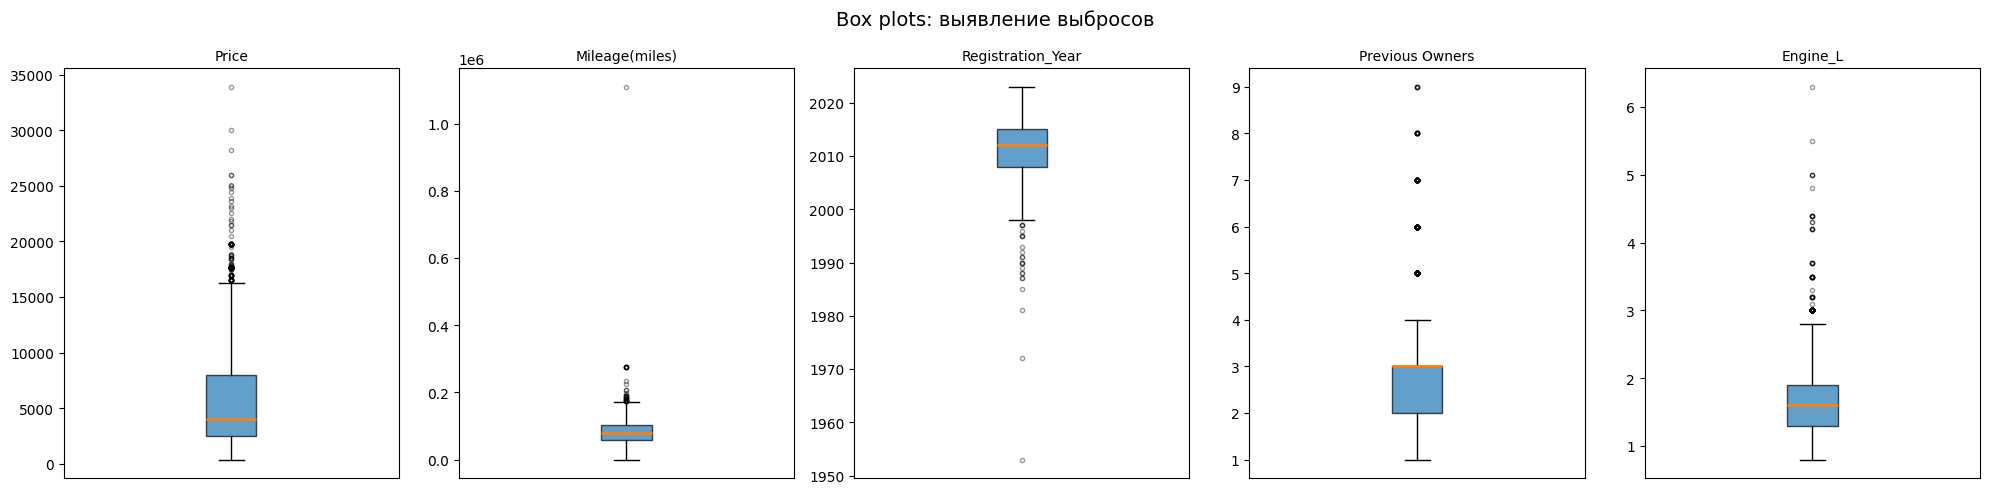

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(outlier_cols):
    data = df[col].dropna()
    bp = axes[i].boxplot(data, patch_artist=True, vert=True,
                         boxprops=dict(alpha=0.7),
                         flierprops=dict(marker='o', markersize=3, alpha=0.4),
                         medianprops=dict(linewidth=2))
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xticks([])
fig.suptitle('Box plots: выявление выбросов', fontsize=14)
plt.tight_layout()
plt.show()

Наибольшее число выбросов наблюдается в `Price` и `Mileage(miles)`. В `Price` есть автомобили с экстремально высокой стоимостью. У `Mileage(miles)` тоже есть автомобили с нетипично большим пробегом

## 5. Визуализация с помощью matplotlib

### 5.1 Гистограмма: распределение цены

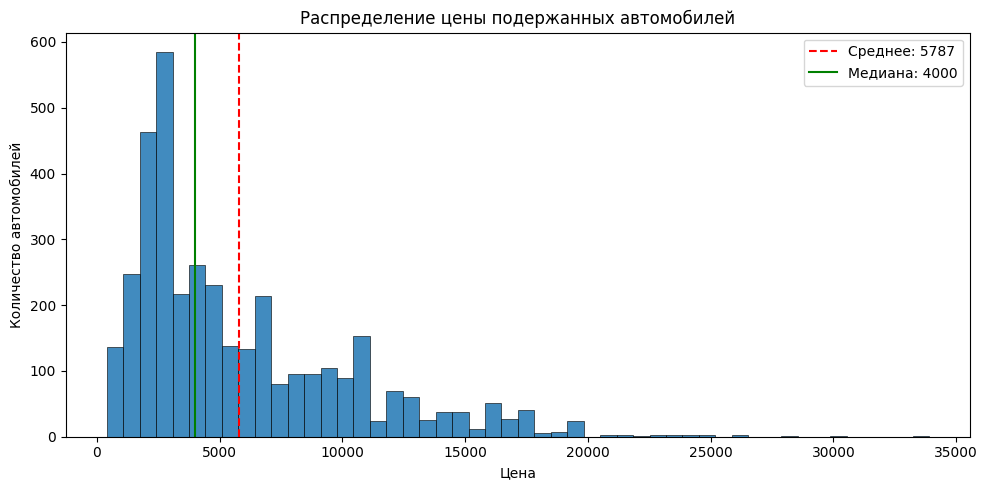

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
prices = df['Price'].dropna()
ax.hist(prices, bins=50, edgecolor='black', linewidth=0.5, alpha=0.85)
ax.axvline(prices.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Среднее: {prices.mean():.0f}')
ax.axvline(prices.median(), color='green', linestyle='-', linewidth=1.5, label=f'Медиана: {prices.median():.0f}')
ax.set_xlabel('Цена')
ax.set_ylabel('Количество автомобилей')
ax.set_title('Распределение цены подержанных автомобилей')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

### 5.2 Столбчатая диаграмма: распределение типа кузова

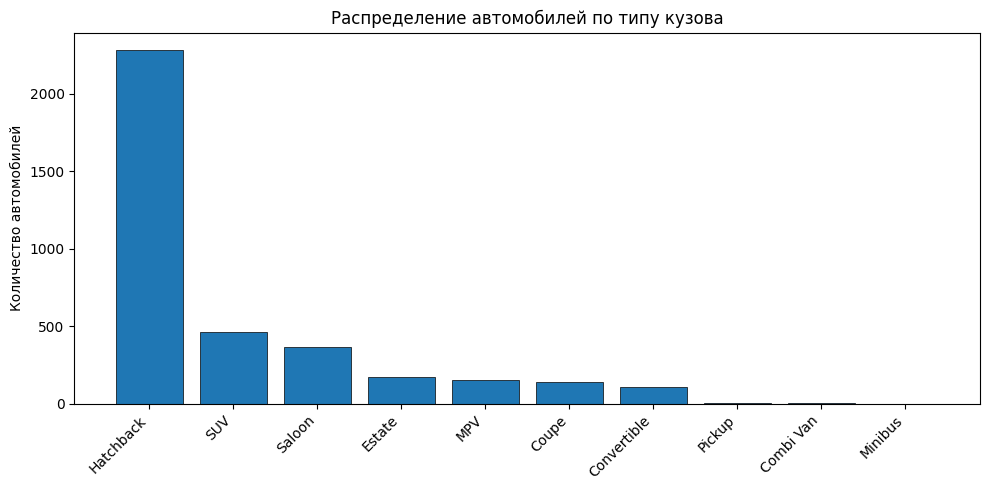

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
body_counts = df['Body type'].value_counts()
bars = ax.bar(range(len(body_counts)), body_counts.values,
              edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(body_counts)))
ax.set_xticklabels(body_counts.index, rotation=45, ha='right')
ax.set_ylabel('Количество автомобилей')
ax.set_title('Распределение автомобилей по типу кузова')

plt.tight_layout()
plt.show()

Доминирующий тип кузова - Hatchback, далее идут SUV и Saloon

### 5.3 Диаграмма рассеяния (bubble scatter plot): пробег, цена, объём двигателя

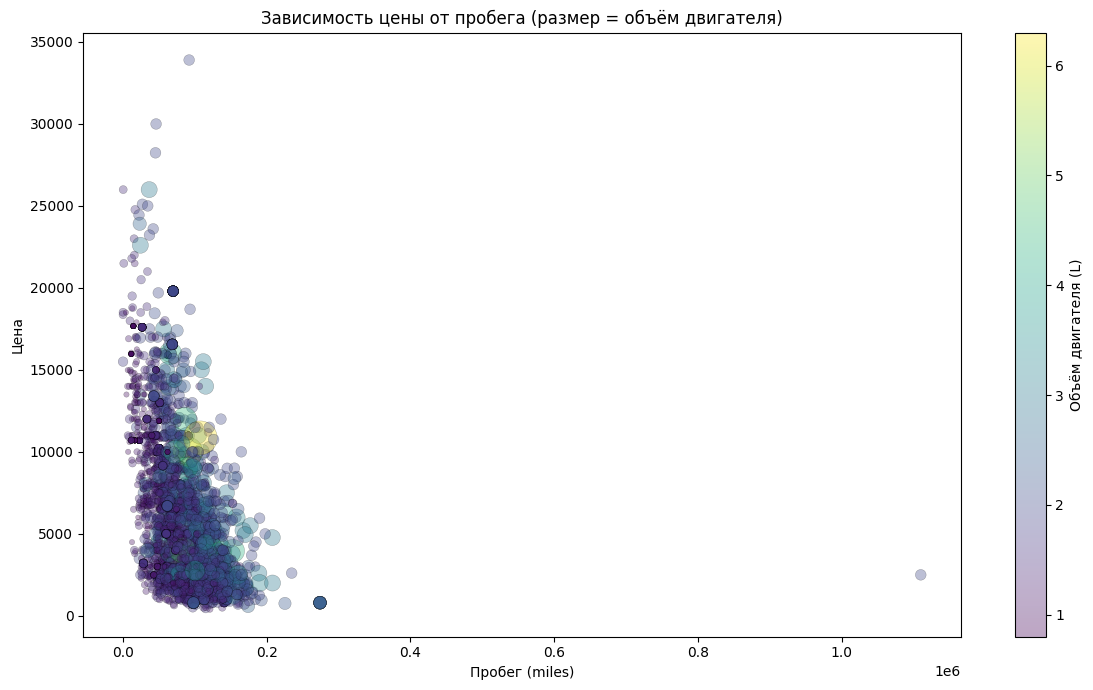

In [39]:
# bubble scatter: x = mileage, y = price, size = engine volume
subset = df.dropna(subset=['Mileage(miles)', 'Price', 'Engine_L']).copy()
sizes = (subset['Engine_L'] ** 2) * 15

fig, ax = plt.subplots(figsize=(12, 7))
scatter = ax.scatter(subset['Mileage(miles)'], subset['Price'],
                     s=sizes, alpha=0.35, c=subset['Engine_L'],
                     cmap='viridis', edgecolors='black', linewidth=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Объём двигателя (L)')
ax.set_xlabel('Пробег (miles)')
ax.set_ylabel('Цена')
ax.set_title('Зависимость цены от пробега (размер = объём двигателя)')
plt.tight_layout()
plt.show()

Чем больше пробег, тем ниже цена - зависимость отчётливо видна. Автомобили с большим объёмом двигателя (крупные точки) распределены по всему ценовому диапазону, но чаще встречаются в верхнем сегменте цен.

### 5.4 Box plot: цена по типу топлива

C:\Users\Platon\AppData\Local\Temp\ipykernel_58860\4249101181.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(fuel_data, patch_artist=True, labels=fuel_types, vert=True,


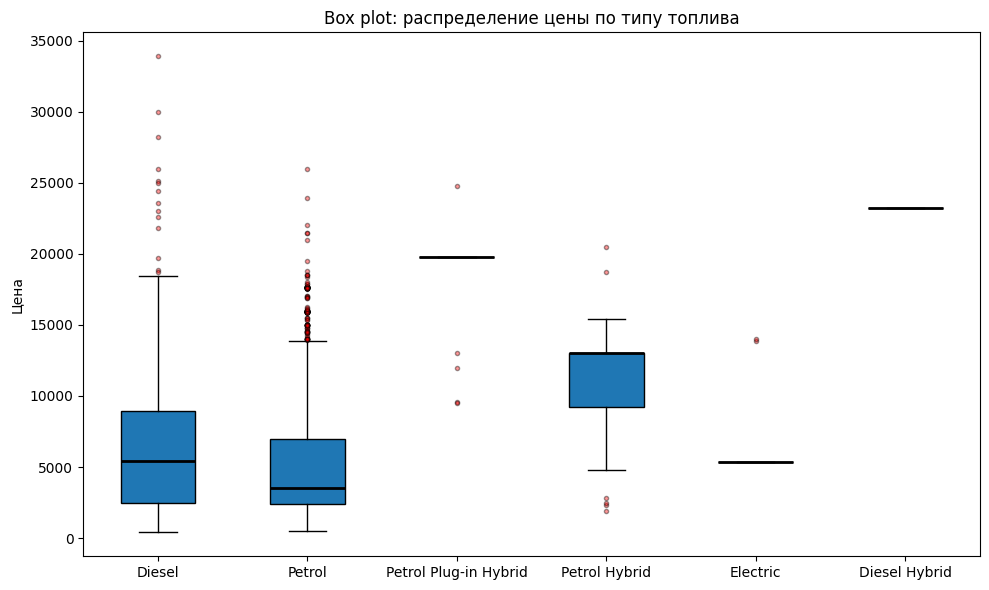

In [51]:
fuel_types = df['Fuel type'].dropna().unique()
fuel_data = [df.loc[df['Fuel type'] == ft, 'Price'].dropna().values for ft in fuel_types]

fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(fuel_data, patch_artist=True, labels=fuel_types, vert=True,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.4),
                medianprops=dict(color='black', linewidth=2))

ax.set_ylabel('Цена')
ax.set_title('Box plot: распределение цены по типу топлива')
plt.tight_layout()
plt.show()

Гибридные автомобили (Hybrid) демонстрируют наивысшую медианную цену, что ожидаемо. Дизельные автомобили немного дороже бензиновых

### 5.5 Дополнительная визуализация: pie chart по типу трансмиссии

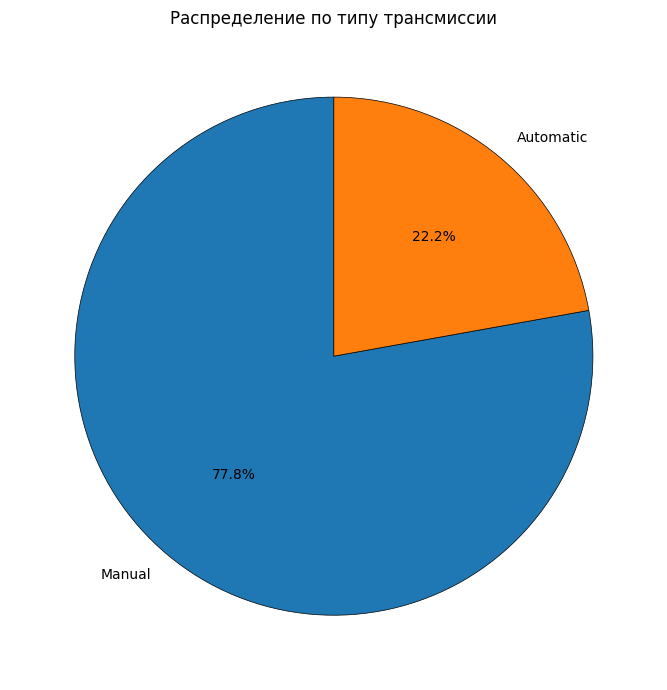

In [44]:
gearbox_counts = df['Gearbox'].value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(gearbox_counts.values, labels=gearbox_counts.index,
                                   autopct='%1.1f%%', startangle=90,
                                   wedgeprops=dict(edgecolor='black', linewidth=0.5))

ax.set_title('Распределение по типу трансмиссии')
plt.tight_layout()
plt.show()

Подавляющее большинство подержанных автомобилей в Великобритании имеют механическую коробку передач.

### 5.6 Дополнительная визуализация: зависимость цены от года регистрации

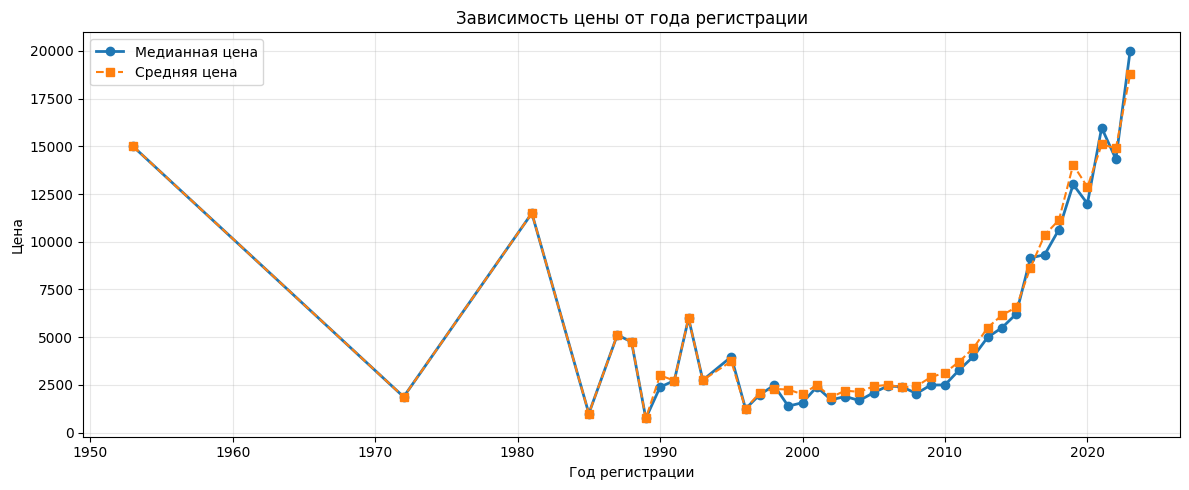

In [45]:
year_median = df.groupby('Registration_Year')['Price'].median()
year_mean = df.groupby('Registration_Year')['Price'].mean()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(year_median.index, year_median.values, marker='o', linewidth=2, label='Медианная цена')
ax.plot(year_mean.index, year_mean.values, marker='s', linewidth=1.5, linestyle='--', label='Средняя цена')
ax.set_xlabel('Год регистрации')
ax.set_ylabel('Цена')
ax.set_title('Зависимость цены от года регистрации')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Чёткий восходящий тренд — чем новее автомобиль, тем выше его цена. Средняя цена значительно выше медианы в последние годы, что говорит о наличии дорогих автомобилей-выбросов в этих группах.

### 5.7 Box plot цены по типу коробки передач

C:\Users\Platon\AppData\Local\Temp\ipykernel_58860\2315351077.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(gb_data, patch_artist=True, labels=gearbox_types, vert=True,


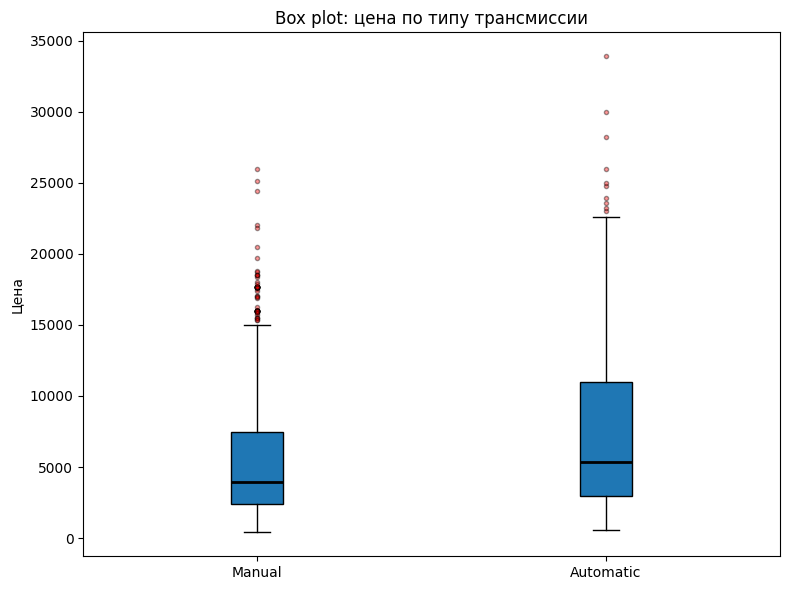

In [48]:
gearbox_types = df['Gearbox'].dropna().unique()
gb_data = [df.loc[df['Gearbox'] == g, 'Price'].dropna().values for g in gearbox_types]

fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot(gb_data, patch_artist=True, labels=gearbox_types, vert=True,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.4),
                medianprops=dict(color='black', linewidth=2))

ax.set_ylabel('Цена')
ax.set_title('Box plot: цена по типу трансмиссии')
plt.tight_layout()
plt.show()

Автомобили с автоматической коробкой передач имеют более высокую медианную цену, чем механические. Это объясняется тем, что автомат чаще встречается в автомобилях более высокого класса

## 6. Интерпретация и выводы

### Какие выводы я сделал

- **Пробег (`Mileage`)** - один из ключевых факторов ценообразования: чем больше пробег, тем ниже цена. Зависимость хорошо видна на scatter plot (5.3, 5.8).
- **Год регистрации (`Registration_Year`)** - второй по важности: более новые автомобили стоят значительно дороже (5.6).
- **Тип топлива (`Fuel type`)** - гибриды дороже, дизель чуть дороже бензина (5.4, 5.8).
- **Тип трансмиссии (`Gearbox`)** - автомат стабильно дороже механики (5.7).

### Признаки с высоким уровнем пропусков или аномалий

- **`Service history`** - более 60% пропусков. Это делает признак малоинформативным в необработанном виде. Заполнен категорией `'Unknown'`.
- **`Previous Owners`** - около 20% пропусков, заполнены медианой
- **`Price`** - значительные выбросы вправо (дорогие автомобили)
- **`Mileage(miles)`** - аналогично, есть автомобили с экстремально высоким пробегом